In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [14]:
true_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv')

In [15]:
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [16]:
print('Duplicated rows in True dataset:')
display(true_df[true_df.duplicated(keep=False)].sort_values(by='text'))
print('Duplicated rows in Fake dataset:')
display(fake_df[fake_df.duplicated(keep=False)].sort_values(by='text'))

Duplicated rows in True dataset:


,title,text,subject,date
11816,Russia detains Norwegian citizen over suspecte...,(Corrects a Dec. 19 story to make clear in gr...,worldnews,"December 19, 2017"
11720,Russia detains Norwegian citizen over suspecte...,(Corrects a Dec. 19 story to make clear in gr...,worldnews,"December 19, 2017"
11777,UK's May to visit China around Jan. 31: Sky News,(Reuters) - British Prime Minister Theresa May...,worldnews,"December 20, 2017"
11681,UK's May to visit China around Jan. 31: Sky News,(Reuters) - British Prime Minister Theresa May...,worldnews,"December 20, 2017"
11800,"Germany's conservatives, SPD start talks Jan. ...",(Reuters) - German Chancellor Angela Merkel s ...,worldnews,"December 20, 2017"
...,...,...,...,...
11272,Reuters journalists in Myanmar appear in court...,YANGON (Reuters) - Two Reuters journalists who...,worldnews,"December 27, 2017"
19042,Couple defy Hurricane Maria on roof to save pe...,"YAUCO, Puerto Rico (Reuters) - Hurricane Maria...",worldnews,"September 26, 2017"
19041,Couple defy Hurricane Maria on roof to save pe...,"YAUCO, Puerto Rico (Reuters) - Hurricane Maria...",worldnews,"September 26, 2017"
11802,Swiss government urges voters to reject call f...,ZURICH (Reuters) - The Swiss government urged ...,worldnews,"December 20, 2017"


Duplicated rows in Fake dataset:


,title,text,subject,date
11445,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017"
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017"
9941,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017"
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017"
14924,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015"
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015"


In [17]:
print('Rows with empty / short text in True dataset:')
display(true_df[true_df['text'].str.len() < 10].sort_values('text'))
print('Rows with empty / short text in Fake dataset:')
display(fake_df[fake_df['text'].str.len() < 10].sort_values('text'))

Rows with empty / short text in True dataset:


,title,text,subject,date
8970,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016"


Rows with empty / short text in Fake dataset:


,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
16173,TREY GOWDY ON SPYING ON AMERICAN CITIZENS…Like...,,Government News,"Mar 28, 2017"
16178,SENIOR CIA INTEL: “Wiretapping of Trump Transi...,,Government News,"Mar 27, 2017"
16180,THE HORRIBLE END GAME: BERNIE SANDERS Calls fo...,,Government News,"Mar 26, 2017"
16182,OUTRAGEOUS! NANCY PELOSI Claims Obamacare Hono...,,Government News,"Mar 25, 2017"
...,...,...,...,...
11685,ARROGANT ILLEGAL ALIEN Who Voted 5 Times In 20...,Watch:,politics,"Feb 11, 2017"
19156,ARROGANT ILLEGAL ALIEN Who Voted 5 Times In 20...,Watch:,left-news,"Feb 11, 2017"
12174,ARMY-NAVY CROWD ERUPTS During Trump Interview…...,Watch:,politics,"Dec 10, 2016"
19235,TRUMP’S BRILLIANT Director Of Communications O...,Watch:,left-news,"Jan 28, 2017"


In [18]:
print('Some Rows with invalid date in Fake dataset:')
display(fake_df.groupby('date')[['date']].count())

Some Rows with invalid date in Fake dataset:


,date
date,
14-Feb-18,1
15-Feb-18,9
16-Feb-18,8
17-Feb-18,7
18-Feb-18,7
...,...
https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/,1
https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/,1
https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/,1


# Clean data

In [19]:
# Remove duplicated rows
true_df = true_df[~true_df.duplicated()]
fake_df = fake_df[~fake_df.duplicated()]

# Remove rows with empty / short text
true_df = true_df[true_df['text'].str.len() > 10]
fake_df = fake_df[fake_df['text'].str.len() > 10]

# Convert date string to date
true_df['date'] = pd.to_datetime(true_df['date'], errors='coerce')
fake_df['date'] = pd.to_datetime(fake_df['date'], errors='coerce')

# Remove rows with non-date values in 'date' column
true_df.dropna(inplace = True)
fake_df.dropna(inplace = True)

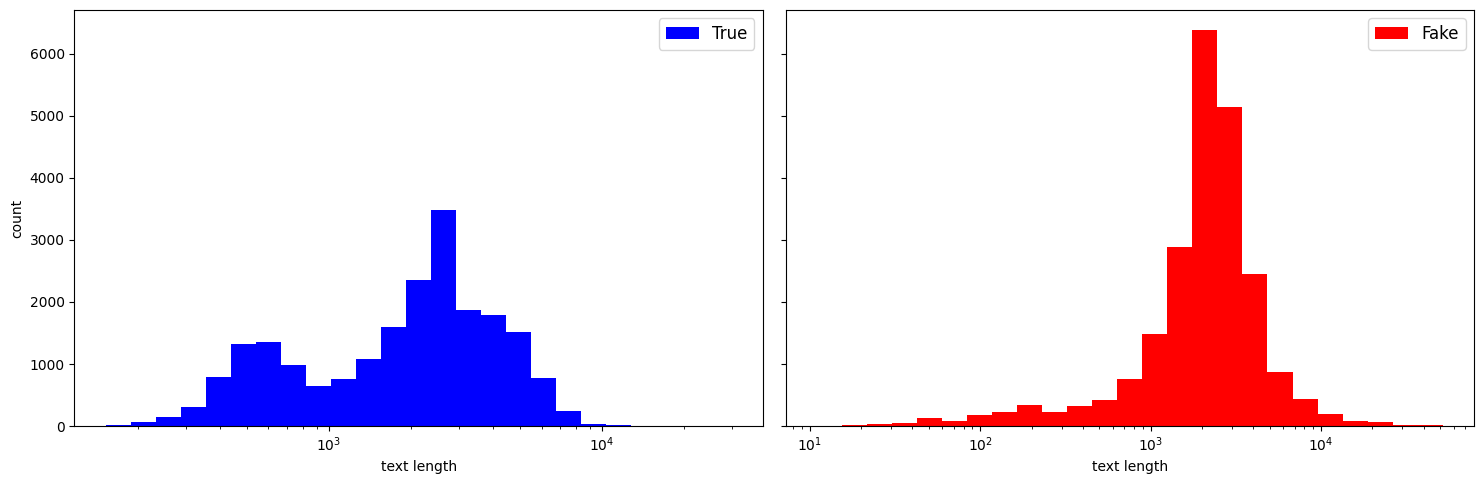

In [20]:

true_df['text_len'] = true_df['text'].str.len()
true_df['text_len_log'] = round(np.log10(true_df['text_len']), 0)

fake_df['text_len'] = fake_df['text'].str.len()
fake_df['text_len_log'] = round(np.log10(fake_df['text_len']), 0)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, tight_layout=True)
plt.rc('font', size=12)

hist, bins = np.histogram(true_df['text_len'], bins=25)
logbins = np.logspace(np.log10(bins[0]), np.log10(bins[-1]), len(bins))

axs[0].hist(true_df['text_len'], bins=logbins, label='True', color='Blue')
axs[0].set_xscale('log')
axs[0].set_xlabel('text length')
axs[0].set_ylabel('count')
axs[0].legend()

hist, bins = np.histogram(fake_df['text_len'], bins=25)
logbins = np.logspace(np.log10(bins[0]), np.log10(bins[-1]), len(bins))
axs[1].hist(fake_df['text_len'], bins=logbins, label='Fake', color='Red')
axs[1].set_xscale('log')
axs[1].set_xlabel('text length')
# axs[1].set_ylabel('count')
axs[1].legend()

plt.show()

# Count Entry by Date

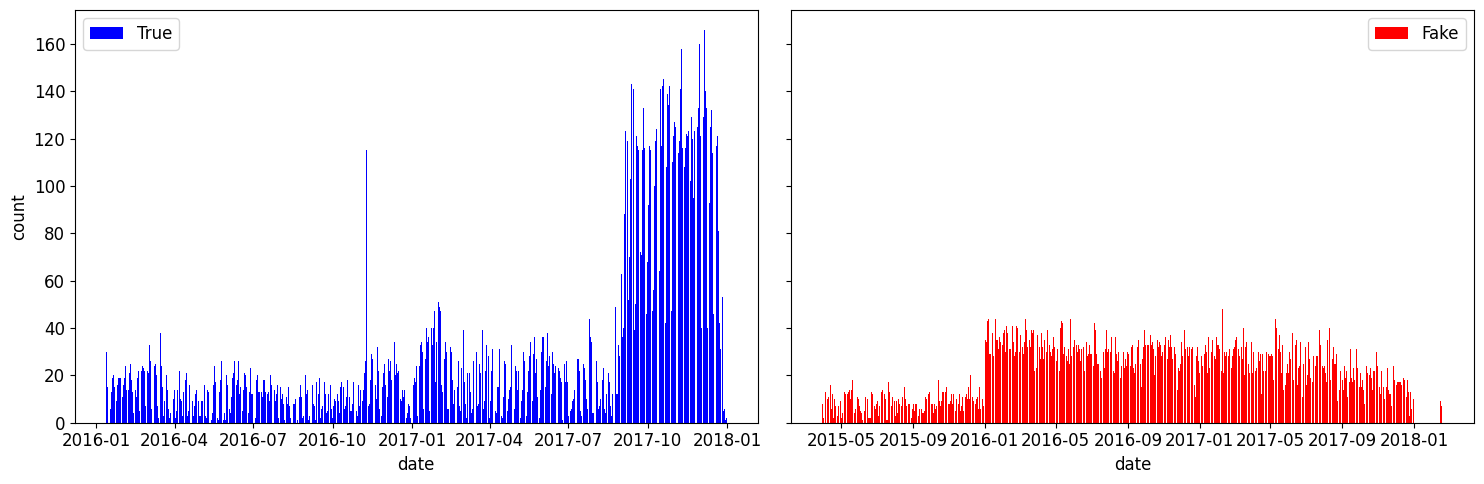

In [ ]:
count_true_entry_by_date = true_df.groupby(['date'])['date'].count()
count_fake_entry_by_date = fake_df.groupby(['date'])['date'].count()

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, tight_layout=True)
plt.rc('font', size=12)

axs[0].bar(count_true_entry_by_date.index, count_true_entry_by_date.values, label='True', color='Blue')
axs[0].set_xlabel('date')
axs[0].set_ylabel('count')
axs[0].legend()

axs[1].bar(count_fake_entry_by_date.index, count_fake_entry_by_date.values, label='Fake', color='Red')
axs[1].set_xlabel('date')
# axs[1].set_ylabel('count')
axs[1].legend()

plt.show()

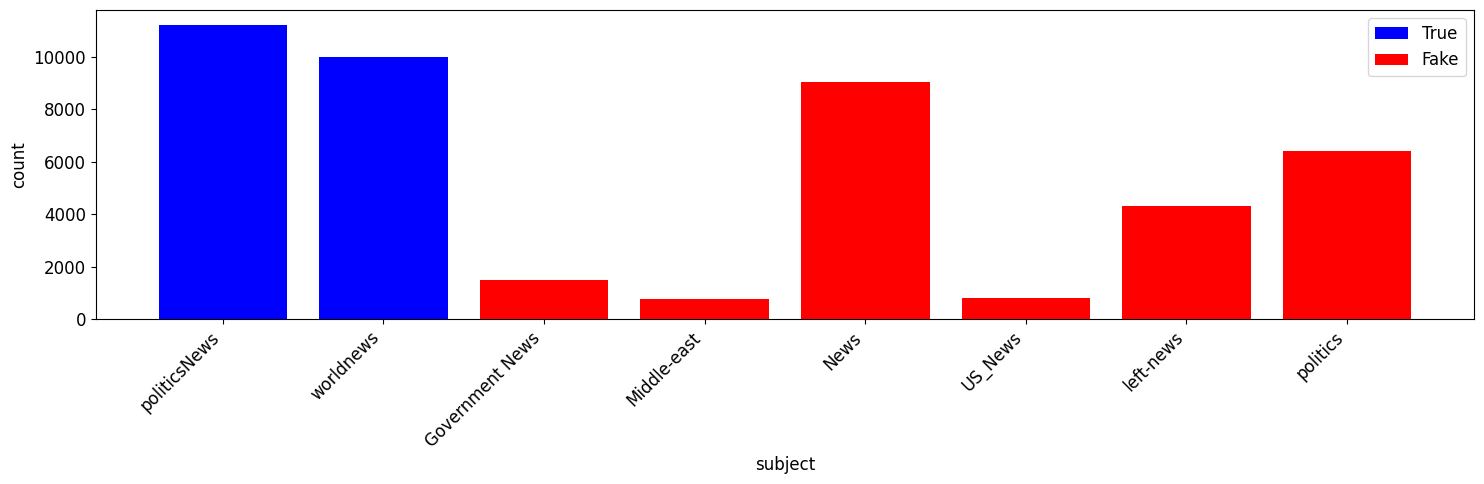

In [ ]:
count_true_entry_by_subject = true_df.groupby(['subject'])['subject'].count()
count_fake_entry_by_subject = fake_df.groupby(['subject'])['subject'].count()

fig, axs = plt.subplots(1, 1, figsize=(15, 5), sharey=True, tight_layout=True)
plt.rc('font', size=12)

axs.bar(
    count_true_entry_by_subject.index, count_true_entry_by_subject.values, label='True', color='Blue'
)
plt.setp(axs.get_xticklabels(), rotation=45, ha='right')
axs.set_xlabel('subject')
axs.set_ylabel('count')
axs.legend()

axs.bar(
    count_fake_entry_by_subject.index, count_fake_entry_by_subject.values, label='Fake', color='Red'
)
plt.setp(axs.get_xticklabels(), rotation=45, ha='right')
axs.set_xlabel('subject')
# axs[1].set_ylabel('count')
axs.legend()

plt.show()

# Checking Normality

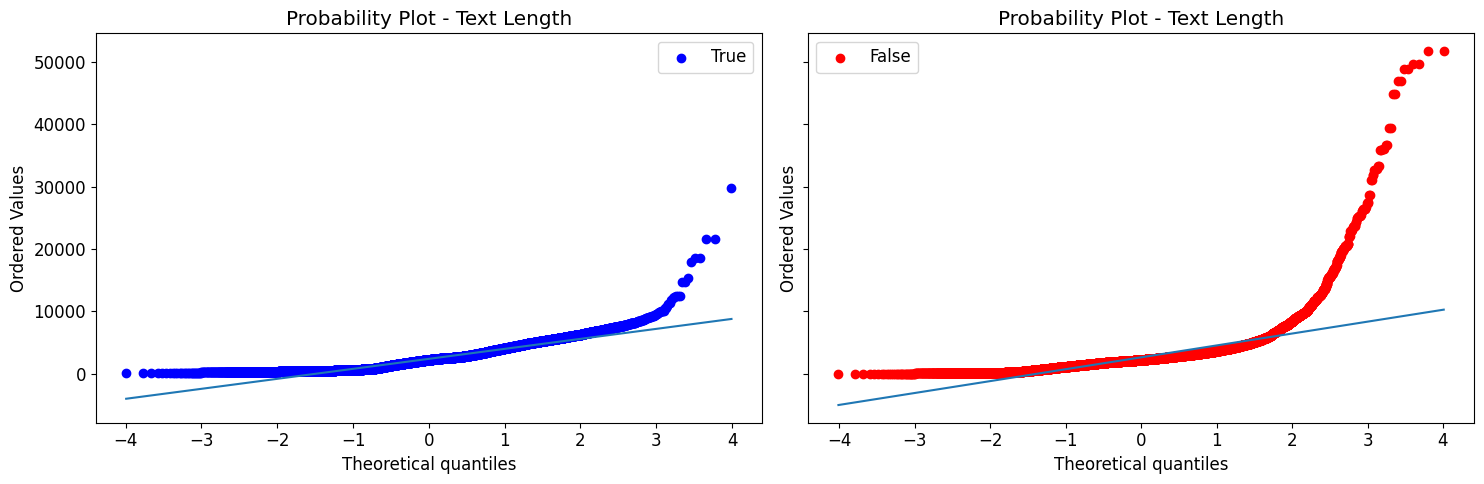

In [ ]:
true_probplot_quantile, true_probplot_fit = stats.probplot(true_df['text_len'], plot=None)
fake_probplot_quantile, fake_probplot_fit = stats.probplot(fake_df['text_len'], plot=None)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, tight_layout=True)
plt.rc('font', size=12)

axs[0].scatter(true_probplot_quantile[0], true_probplot_quantile[1], label='True', color='Blue')
axs[0].plot(
    true_probplot_quantile[0], 
    (true_probplot_quantile[0] * true_probplot_fit[0] + true_probplot_fit[1]),
)
axs[0].set_title('Probability Plot - Text Length')
axs[0].set_xlabel('Theoretical quantiles')
axs[0].set_ylabel('Ordered Values')
axs[0].legend()

axs[1].scatter(fake_probplot_quantile[0], fake_probplot_quantile[1], label='False', color='Red')
axs[1].plot(
    fake_probplot_quantile[0], 
    (fake_probplot_quantile[0] * fake_probplot_fit[0] + fake_probplot_fit[1]),
)
axs[1].set_title('Probability Plot - Text Length')
axs[1].set_xlabel('Theoretical quantiles')
axs[1].set_ylabel('Ordered Values')
axs[1].legend()

plt.show()

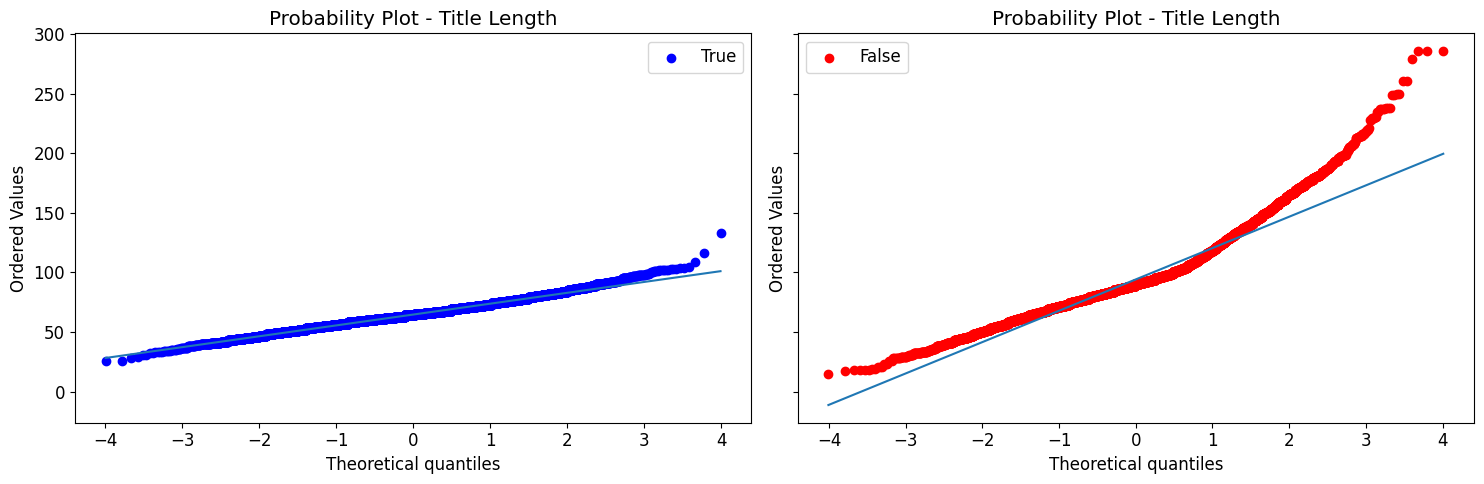

In [ ]:
true_probplot_quantile, true_probplot_fit = stats.probplot(true_df['title'].str.len(), plot=None)
fake_probplot_quantile, fake_probplot_fit = stats.probplot(fake_df['title'].str.len(), plot=None)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, tight_layout=True)
plt.rc('font', size=12)

axs[0].scatter(true_probplot_quantile[0], true_probplot_quantile[1], label='True', color='Blue')
axs[0].plot(
    true_probplot_quantile[0], 
    (true_probplot_quantile[0] * true_probplot_fit[0] + true_probplot_fit[1]),
)
axs[0].set_title('Probability Plot - Title Length')
axs[0].set_xlabel('Theoretical quantiles')
axs[0].set_ylabel('Ordered Values')
axs[0].legend()

axs[1].scatter(fake_probplot_quantile[0], fake_probplot_quantile[1], label='False', color='Red')
axs[1].plot(
    fake_probplot_quantile[0], 
    (fake_probplot_quantile[0] * fake_probplot_fit[0] + fake_probplot_fit[1]),
)
axs[1].set_title('Probability Plot - Title Length')
axs[1].set_xlabel('Theoretical quantiles')
axs[1].set_ylabel('Ordered Values')
axs[1].legend()

plt.show()

Highest frequency words in true and fake news

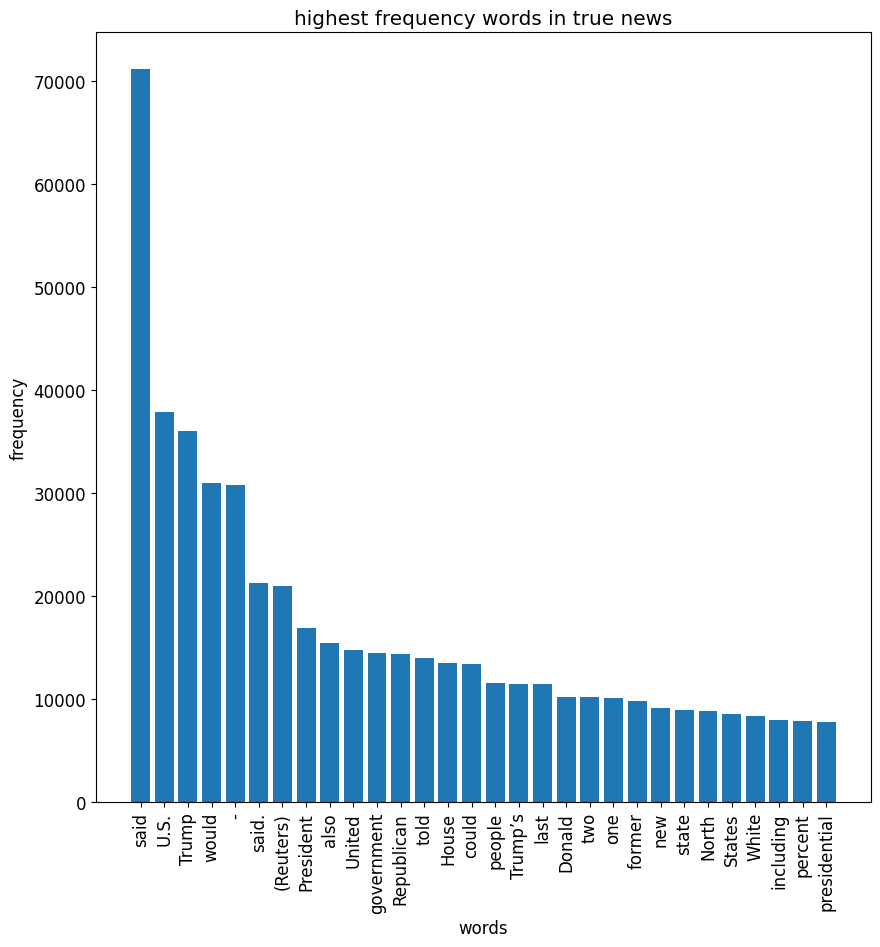

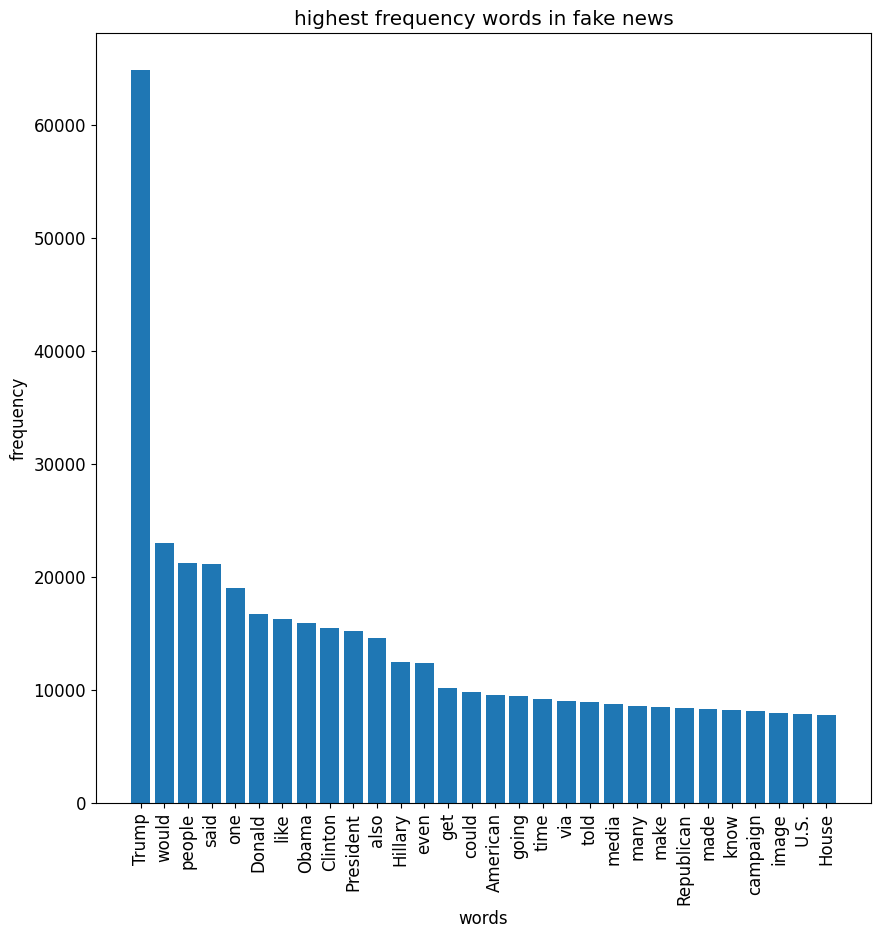

In [23]:
from operator import itemgetter
from nltk.corpus import stopwords
stop = stopwords.words('english')

worddensity = {}
for row in true_df['text']:
  for word in row.split():
    if word.lower() not in stop:
      if word in worddensity:
        worddensity[word]+=1
      else:
        worddensity[word]=1

res = dict(sorted(worddensity.items(), key = itemgetter(1), reverse = True)[:30])

worddensityf = {}
for row in fake_df['text']:
  for word in row.split():
    if word.lower() not in stop:
      if word in worddensityf:
        worddensityf[word]+=1
      else:
        worddensityf[word]=1

resf = dict(sorted(worddensityf.items(), key = itemgetter(1), reverse = True)[:30])


fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.bar(list(res.keys()),list(res.values()))
axs.set_title('highest frequency words in true news')
axs.set_xlabel("words")
axs.set_ylabel("frequency")
plt.xticks(rotation=90)
plt.show()



fig, axs = plt.subplots(1, 1, figsize=(10, 10))

axs.bar(list(resf.keys()),list(resf.values()))
axs.set_title('highest frequency words in fake news')
axs.set_xlabel("words")
axs.set_ylabel("frequency")

plt.xticks(rotation=90)
plt.show()



## Named Entity's distribution across True and Fake news

-  One of the major ways humans identify if a news is fake or true is try to find the associated entity. For example I am more likely to trust a news written by New York Times rather than a news article written by a random person on internet.
-  This section aims to identify the named enities in all of the text and show their distribution across the categories


In [ ]:
# !pip install spacy
#!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 8.6 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")

In [ ]:
true_df

,title,text,subject,date,text_len,text_len_log
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,4659,4.0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,4077,4.0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,2789,3.0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,2461,3.0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,5204,4.0
...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,2821,3.0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,800,3.0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,1950,3.0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,1199,3.0


In [ ]:
fake_df

,title,text,subject,date,text_len,text_len_log
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,2893,3.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1898,3.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,3597,4.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,2774,3.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,2346,3.0
...,...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,2016-01-16,3237,4.0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,2016-01-16,1684,3.0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,2016-01-15,25065,4.0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,2016-01-14,2685,3.0


In [ ]:
def populateNamedEntity(df):
    
    named_entity = {} # Stores named entity for example "Reuters": {"Entity":"ORG","Count": 10,"Location":["title/text"]}
    
    textList = df["text"].tolist()
    titleList = df["title"].tolist()
    textNamedEntity = []
    textEntityCategory = []
    titleNamedEntity = []
    titleEntityCategory = []
    
    
    for index,text in enumerate(textList):
        textNER = NER(text)       
        tempNameEntity = []
        tempEntityCategory = []
        for word in textNER.ents:
            if word.text in named_entity:
                named_entity[word.text]["Count"]+=1
                named_entity[word.text]["Location"].append("text")
            else:
                named_entity[word.text] = {"Entity":word.label_,"Count": 1,"Location":["text"]}
            tempNameEntity.append(word.text)
            tempEntityCategory.append(word.label_)
        textNamedEntity.append(";".join(tempNameEntity))
        textEntityCategory.append(";".join(tempEntityCategory))
        if index%2000 == 0:
            print("Processed: "+ str(index) + " Entries")
            
    
    for index,title in enumerate(titleList):
        titleNER = NER(title)
        tempNameEntity = []
        tempEntityCategory = []
        for word in titleNER.ents:
            if word.text in named_entity:
                named_entity[word.text]["Count"]+=1
                named_entity[word.text]["Location"].append("title")
            else:
                named_entity[word.text] = {"Entity":word.label_,"Count": 1,"Location":["title"]}
            tempNameEntity.append(word.text)
            tempEntityCategory.append(word.label_)
        titleNamedEntity.append(";".join(tempNameEntity))
        titleEntityCategory.append(";".join(tempEntityCategory))
        if index%2000 == 0:
            print("Processed: "+str(index) + " Entries")
            
    return [named_entity,textNamedEntity,textEntityCategory,titleNamedEntity,titleEntityCategory]
    


In [ ]:
true_processed_entity = populateNamedEntity(true_df)

Processed: 0 Entries
Processed: 2000 Entries
Processed: 4000 Entries
Processed: 6000 Entries
Processed: 8000 Entries
Processed: 10000 Entries
Processed: 12000 Entries
Processed: 14000 Entries
Processed: 16000 Entries
Processed: 18000 Entries
Processed: 20000 Entries
Processed: 0 Entries
Processed: 2000 Entries
Processed: 4000 Entries
Processed: 6000 Entries
Processed: 8000 Entries
Processed: 10000 Entries
Processed: 12000 Entries
Processed: 14000 Entries
Processed: 16000 Entries
Processed: 18000 Entries
Processed: 20000 Entries


In [ ]:
fake_processed_entity = populateNamedEntity(fake_df)

Processed: 0 Entries
Processed: 2000 Entries
Processed: 4000 Entries
Processed: 6000 Entries
Processed: 8000 Entries
Processed: 10000 Entries
Processed: 12000 Entries
Processed: 14000 Entries
Processed: 16000 Entries
Processed: 18000 Entries
Processed: 20000 Entries
Processed: 22000 Entries
Processed: 0 Entries
Processed: 2000 Entries
Processed: 4000 Entries
Processed: 6000 Entries
Processed: 8000 Entries
Processed: 10000 Entries
Processed: 12000 Entries
Processed: 14000 Entries
Processed: 16000 Entries
Processed: 18000 Entries
Processed: 20000 Entries
Processed: 22000 Entries


In [ ]:
!pip install wordcloud --user

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


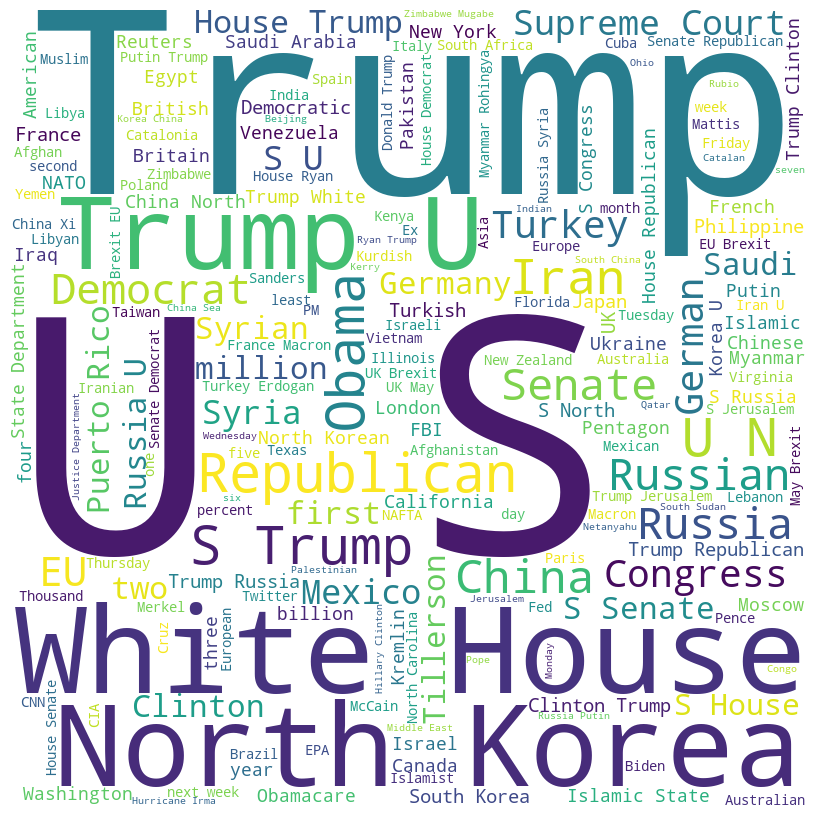

In [ ]:
wordcloud_true_title_entity = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(" ". join(true_processed_entity[3]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_true_title_entity)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

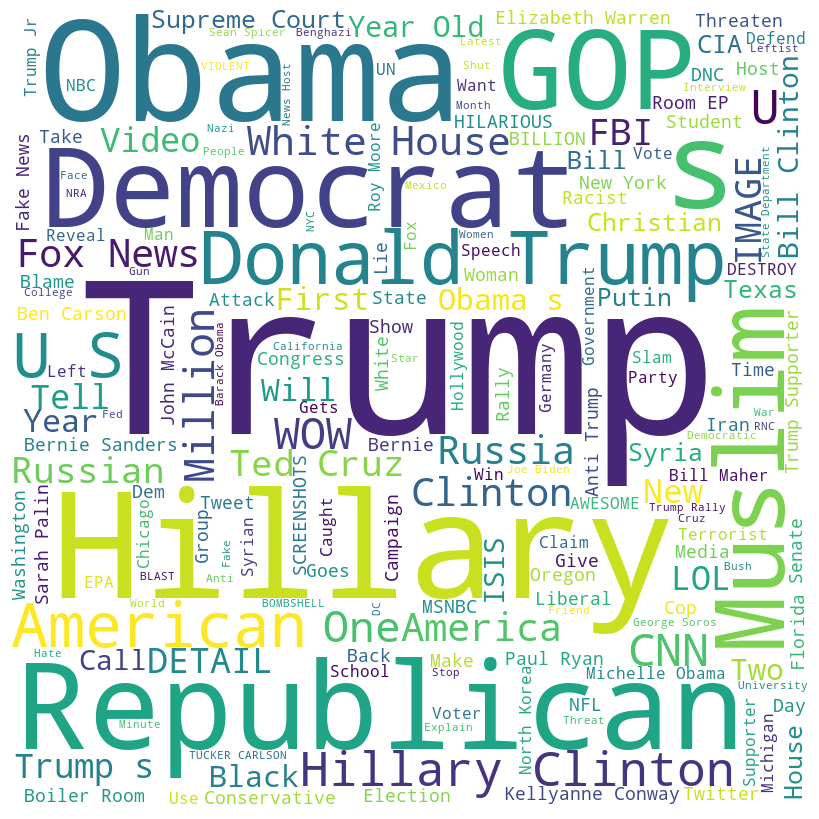

In [ ]:
wordcloud_fake_title_entity = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(" ". join(fake_processed_entity[3]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_fake_title_entity)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()